<a href="https://colab.research.google.com/github/Karthikbv29/Batch108/blob/main/Titanic_SD_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries


In [ ]:
import pandas as pd
import numpy as np

# Reading the CSV file

In [ ]:
data=pd.read_csv('Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Exploration

In [ ]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
sample_id=data['PassengerId']
data=data.drop(['Cabin','PassengerId','Name','Ticket'],axis=1)

# Visualizing the data

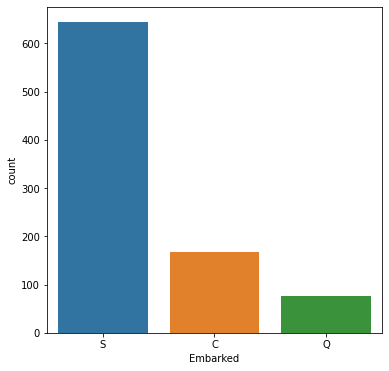

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
sns.countplot(x='Embarked',data=data)


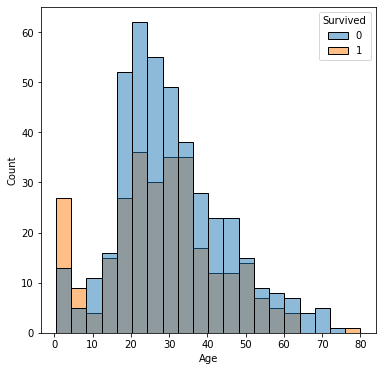

In [ ]:
plt.figure(figsize=(6,6))
sns.histplot(x=data['Age'],hue=data['Survived'])

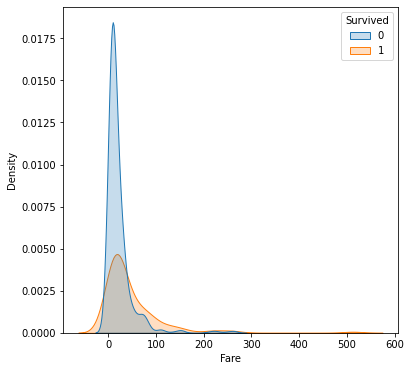

In [ ]:
plt.figure(figsize=(6,6))
sns.kdeplot(x=data['Fare'],hue=data['Survived'],shade=True)

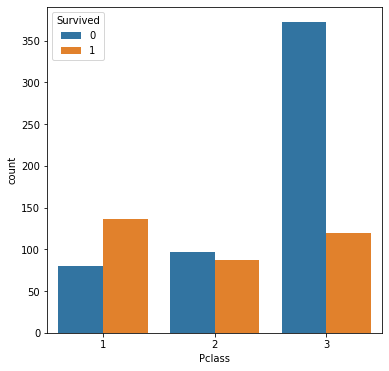

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x=data['Pclass'],hue=data['Survived'])

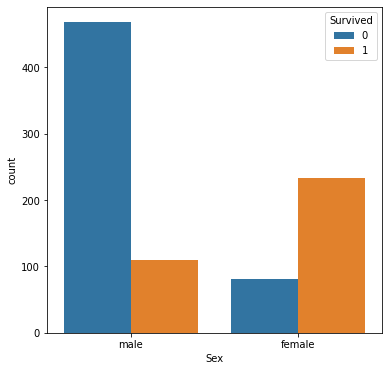

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x=data['Sex'],hue=data['Survived'])

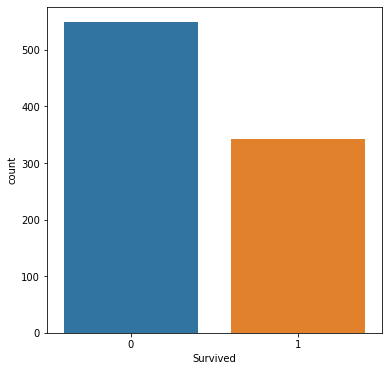

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x=data['Survived'])

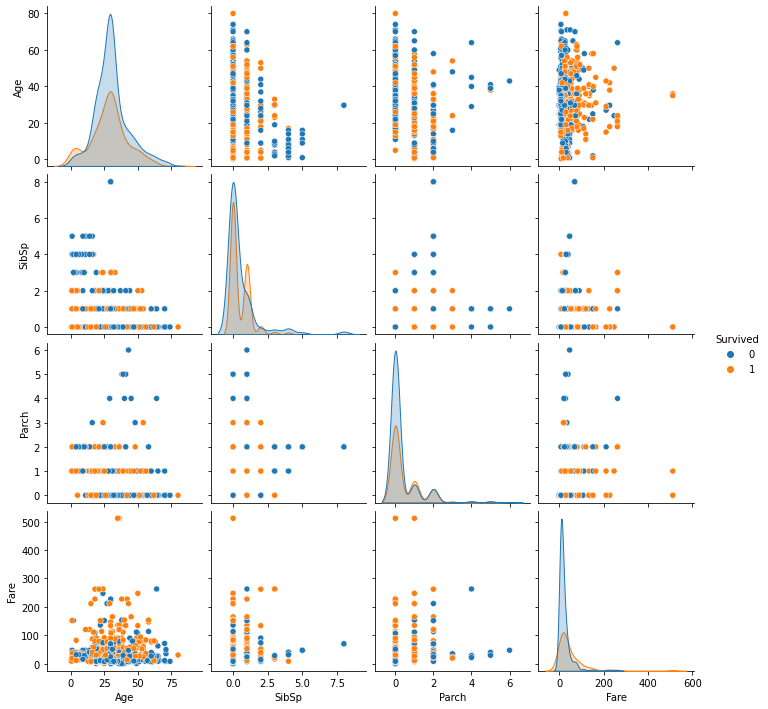

In [ ]:
sns.pairplot(data,hue='Survived')

# Filling the missing values

In [ ]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [ ]:
data['Embarked'].fillna('S',inplace=True)

In [ ]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
num_cols=['Age','SibSp','Parch','Fare']
cat_cols=['Sex','Embarked','Pclass']

In [ ]:
data[cat_cols]=data[cat_cols].astype('category')

In [ ]:
data.dtypes

Survived       int64
Pclass      category
Sex         category
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked    category
dtype: object

In [ ]:
data['Survived']=data['Survived'].astype('category')

# Data Splitting

In [ ]:
x=data.drop(['Survived'],axis=1)
y=data['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=29)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(623, 7)
(268, 7)
(623,)
(268,)


# Preprocessing the data

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x_train['Sex']=le.fit_transform(x_train['Sex'])
x_train['Embarked']=le.fit_transform(x_train['Embarked'])

x_test['Sex']=le.fit_transform(x_test['Sex'])
x_test['Embarked']=le.fit_transform(x_test['Embarked'])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train[num_cols]=scaler.fit_transform(x_train[num_cols])
x_test[num_cols]=scaler.fit_transform(x_test[num_cols])

# Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [ ]:
trainpreds=log.predict(x_train)
testpreds=log.predict(x_test)

In [ ]:
def evaluate_model(act, pred):
    from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
    print("Confusion Matrix \n", confusion_matrix(act, pred))
    print("Accuracy : ", accuracy_score(act, pred))
    print("Recall   : ", recall_score(act, pred))
    print("Precision: ", precision_score(act, pred)) 

In [ ]:
print('----Train----')
evaluate_model(y_train,trainpreds)
print('----Test----')
evaluate_model(y_test,testpreds)

----Train----
Confusion Matrix 
 [[328  54]
 [ 73 168]]
Accuracy :  0.7961476725521669
Recall   :  0.6970954356846473
Precision:  0.7567567567567568
----Test----
Confusion Matrix 
 [[134  33]
 [ 28  73]]
Accuracy :  0.7723880597014925
Recall   :  0.7227722772277227
Precision:  0.6886792452830188


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
trainpreds_dt=dt.predict(x_train)
testpreds_dt=dt.predict(x_test)

In [ ]:
print('----Train----')
evaluate_model(y_train,trainpreds_dt)
print('----Test----')
evaluate_model(y_test,testpreds_dt)

----Train----
Confusion Matrix 
 [[380   2]
 [  6 235]]
Accuracy :  0.9871589085072231
Recall   :  0.975103734439834
Precision:  0.9915611814345991
----Test----
Confusion Matrix 
 [[129  38]
 [ 22  79]]
Accuracy :  0.7761194029850746
Recall   :  0.7821782178217822
Precision:  0.6752136752136753


In [ ]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
trainpreds_knn=knn.predict(x_train)
testpreds_knn=knn.predict(x_test)

In [ ]:
print('----Train----')
evaluate_model(y_train,trainpreds_knn)
print('----Test----')
evaluate_model(y_test,testpreds_knn)

----Train----
Confusion Matrix 
 [[353  29]
 [ 63 178]]
Accuracy :  0.8523274478330658
Recall   :  0.7385892116182573
Precision:  0.8599033816425121
----Test----
Confusion Matrix 
 [[144  23]
 [ 35  66]]
Accuracy :  0.7835820895522388
Recall   :  0.6534653465346535
Precision:  0.7415730337078652


In [ ]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
trainpreds_rf=rf.predict(x_train)
testpreds_rf=rf.predict(x_test)

In [ ]:
print('----Train----')
evaluate_model(y_train,trainpreds_rf)
print('----Test----')
evaluate_model(y_test,testpreds_rf)

----Train----
Confusion Matrix 
 [[378   4]
 [  4 237]]
Accuracy :  0.9871589085072231
Recall   :  0.983402489626556
Precision:  0.983402489626556
----Test----
Confusion Matrix 
 [[141  26]
 [ 31  70]]
Accuracy :  0.7873134328358209
Recall   :  0.693069306930693
Precision:  0.7291666666666666


In [ ]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
trainpreds_svc=svc.predict(x_train)
testpreds_svc=svc.predict(x_test)

In [ ]:
print('----Train----')
evaluate_model(y_train,trainpreds_svc)
print('----Test----')
evaluate_model(y_test,testpreds_svc)

----Train----
Confusion Matrix 
 [[344  38]
 [ 67 174]]
Accuracy :  0.8314606741573034
Recall   :  0.7219917012448133
Precision:  0.8207547169811321
----Test----
Confusion Matrix 
 [[146  21]
 [ 28  73]]
Accuracy :  0.8171641791044776
Recall   :  0.7227722772277227
Precision:  0.776595744680851


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
trainpreds_ada=ada.predict(x_train)
testpreds_ada=ada.predict(x_test)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gra=GradientBoostingClassifier()
gra.fit(x_train,y_train)
trainpreds_gra=gra.predict(x_train)
testpreds_gra=gra.predict(x_test)

# Model Performance

In [ ]:
cols=['Model','Train_Accuracy','Train_Precision','Train_Recall','Test_Accuracy','Test_Precision','Test_Recall']
performance=pd.DataFrame(columns=cols)

In [ ]:
def add_to_perf(df,model,train_act,train_pred,test_act,test_pred):
  from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
  train_accuracy=accuracy_score(train_act,train_pred)
  test_accuracy=accuracy_score(test_act,test_pred)
  train_precision=precision_score(train_act,train_pred)
  test_precision=precision_score(test_act,test_pred)
  train_recall=recall_score(train_act,train_pred)
  test_recall=recall_score(test_act,test_pred)
  df=df.append(pd.Series([model,train_accuracy,train_precision, train_recall,test_accuracy,test_precision, test_recall],index=df.columns),ignore_index=True)
  return df

In [ ]:
performance=add_to_perf(performance,'Logistic Regression',y_train,trainpreds,y_test,testpreds)

In [ ]:
performance=add_to_perf(performance,'Decision Tree',y_train,trainpreds_dt,y_test,testpreds_dt)

In [ ]:
performance=add_to_perf(performance,'K-Nearest Neighbors',y_train,trainpreds_knn,y_test,testpreds_knn)

In [ ]:
performance=add_to_perf(performance,'Random Forest',y_train,trainpreds_rf,y_test,testpreds_rf)

In [ ]:
performance=add_to_perf(performance,'SVM',y_train,trainpreds_svc,y_test,testpreds_svc)

In [ ]:
performance=add_to_perf(performance,'Ada Boost',y_train,trainpreds_ada,y_test,testpreds_ada)

In [ ]:
performance=add_to_perf(performance,'Gradient Boost',y_train,trainpreds_gra,y_test,testpreds_gra)

In [ ]:
performance

,Model,Train_Accuracy,Train_Precision,Train_Recall,Test_Accuracy,Test_Precision,Test_Recall
0,Logistic Regression,0.796148,0.756757,0.697095,0.772388,0.688679,0.722772
1,Decision Tree,0.987159,0.991561,0.975104,0.776119,0.675214,0.782178
2,K-Nearest Neighbors,0.852327,0.859903,0.738589,0.783582,0.741573,0.653465
3,Random Forest,0.987159,0.983402,0.983402,0.787313,0.729167,0.693069
4,SVM,0.831461,0.820755,0.721992,0.817164,0.776596,0.722772
5,Ada Boost,0.842697,0.812227,0.771784,0.798507,0.728155,0.742574
6,Gradient Boost,0.910112,0.930233,0.829876,0.824627,0.764706,0.772277
